In [ ]:
#Importing Libraries
import numpy as np
import random
import matplotlib.pyplot as plt
import gym

In [ ]:
# Defining Variables and Q-learning parameters
#total_floors: Total number of floors in the building
total_floors = 4
#total_capacity: Total capacity of the elevator
total_capacity = 3
#possible_actions: Total number of possible actions available to the agent
possible_actions = 5
#penalty: The penalty applied for each time step the agent takes
penalty = -1
#reward: The reward received by the agent for successfully dropping off a passenger
reward = 10
#alpha: The learning rate used in Q-learning algorithm
alpha = 0.2
#gamma: The discount factor used in Q-learning algorithm
gamma = 0.8
#epsilon: The epsilon value used in epsilon-greedy exploration strategy
epsilon = 0.7
#arrival_possi: A list of probabilities of passengers arriving at each floor
arrival_possi = [0.2, 0.1, 0.2, 0.5]
#departure_possi: A list of probabilities of passengers leaving the elevator at each floor
departure_possi =[0.25, 0.25, 0.25, 0.25]
#episode_count: The total number of episodes to run the simulation
episode_count = 2000
#max_steps: The maximum number of time steps allowed for each episode
max_steps = 500
#q_table: A numpy array used to store the Q-values for each state-action pair in the MDP.
q_table = np.zeros((total_floors, total_capacity+1, possible_actions))

In [ ]:
def epsilon_policy(state):
    explore = True
    count = 0
    while explore:
        count += 1
        if random.uniform(0, 1) < epsilon:
            action = random.choice(range(possible_actions))
        else:
            action = np.argmax(q_table[state[0], state[1], :])
        if action != 3 or (action == 3 and state[1] > 0):  # check if pickup action is valid
            explore = False
        elif count > 100:  # break the loop after 100 tries
            break
    return action


# Updating Q- Learning values.
def new_q_learning(state, action, next_state, reward):
    q_table[state[0], state[1], action] += alpha * (reward + gamma * np.max(q_table[next_state[0], next_state[1], :]) - q_table[state[0], state[1], action])

In [ ]:
def reward(state, action):
  """
  The function that determines the reward for a particular state and action in the elevator Markov Decision Process (MDP) is called the reward function.
  The reward function assigns a reward of -1 to the "PICKUP" action (action index 3) since the elevator has to wait for passengers to board.
  A reward of 1 is given to the "DROPOFF" action (action index 4) as the passengers have been dropped off successfully.
  For all other actions, a small negative penalty (-0.1) is assigned to motivate the elevator to reach the destination as quickly as possible.
  """
  if action == 3:
        # Boarding passengers
        return -1
  elif action == 4:
        # Dropping off passengers
        return 1
  else:
        # Moving the elevator with a penalty for each time step
        return -0.1
def q_learning():
    """
    The q_learning() function trains the elevator agent using the Q-learning algorithm in the elevator MDP.
    It uses the reward() function to calculate the reward for each state-action pair.
    If the action is "PICKUP" (action index 3), the reward is set to -1 as the elevator has to wait for the passengers to board.
    If the action is "DROPOFF" (action index 4), the reward is set to 1 as the passengers have been successfully dropped off.
    For all other actions, the reward is set to 0.
    The function executes a loop for a specified number of episodes, where the agent starts at the ground floor with no passengers.
    For each episode, the agent selects an action using an epsilon-greedy policy.
    The available actions include moving the elevator up or down, waiting, picking up passengers, or dropping off passengers.
    If the action is to pick up passengers, the function verifies if there is space in the elevator and if there are any waiting passengers on the current floor. If there is space and waiting passengers, the passengers board the elevator and the episode loop terminates.
    If the action is to drop off passengers, the function checks if there are any passengers in the elevator who need to be dropped off at the current floor.
    If there are, the passengers are dropped off and the agent receives a reward of 1.
    The function then returns a list of rewards earned for each episode.
    """
    rewards_per_episode = []# Empty list
    def reward(state, action):
      if action == 3:
        # Boarding passengers
        return -1
      elif action == 4:
        # Dropping off passengers
        return 1
      else:
        # Moving the elevator
        return 0
    for episode in range(episode_count):
        state = [0, -1, -1, -1]# Starting with 0th floor with 0 passengers
        total_reward = 0
        final= False
        done=False
        for step in range(max_steps):
            # Choosing an action by using epsilon greedy policy
            action = epsilon_policy(state)
            # Select one action check for next step and rewards
            if action == 0:
                if state[0] < total_floors-1:
                    state[0] += 1
            elif action == 1:
                if state[0] > 0:
                    state[0] -= 1
            elif action == 2:
                pass
            elif action == 3:
                if state.count(-1) < total_capacity :
                    for i in range(len(state)):
                        if state[i] == state[0]:
                            state[i] = state[0] + 1
                    break
            elif action == 4:
                if state[1:].count(state[0]) > 0:
                    state[1+state[1:].index(state[0])] = -1
                    total_reward += 1

        # Actions when passenger arrives.
        for i in range(len(arrival_possi)):
          if np.random.uniform(0, 1) < departure_possi[i]:
                if -1 in state[1:]:
                    state[state[1:].index(-1)+1] = i
        # Actions when passenger depatures.
        for i in range(len(departure_possi)):
          if np.random.uniform(0, 1) < departure_possi[i]:
                for j in range(len(state[1:])):
                    if state[1+j] == i:
                        state[1+j] = -1
                        total_reward += reward(state, action)
                        break
        # Updating the  Q-table
        next_state = state.copy()
        new_q_learning(state, action, next_state, total_reward)
        # updating new rewards
        total_reward += penalty
        if sum(state[1:]) == -len(state[1:]):
            break
        rewards_per_episode.append(total_reward)
    return q_table, rewards_per_episode

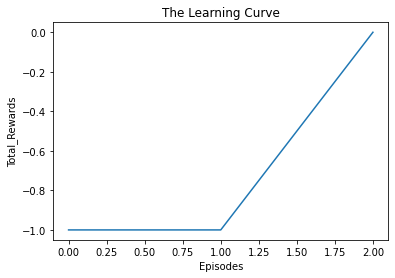

In [ ]:
import matplotlib.pyplot as plt

rewards_per_episode = q_learning()[1] # extract rewards from q_learning function

# plot rewards vs. episode
plt.plot(range(len(rewards_per_episode)), rewards_per_episode)
plt.xlabel('Episodes')
plt.ylabel('Total_Rewards')
plt.title('The Learning Curve')
plt.show()


####Q2)


ANS)The best course of action for the elevator is to WAIT at the floor where it last let a passenger out if all passengers have been let out and there are no new ones waiting.  This is because the elevator has already moved to this floor and there are no passengers waiting to be picked up or dropped off, so waiting at this floor will minimize the number of unnecessary movements and reduce the overall waiting time for future passengers. If the elevator moves to a different floor, it will have to travel back to the previous floor if a new passenger arrives there, which will increase the waiting time for the passenger and the overall travel time for the elevator.



Q3)

The entire set of policies for an MDP can be described as a table, where each row represents a state and the columns list the action values that are available for that state. For each step, the policy selects the action with the highest value.

An elevator MDP policy table using Q-learning is provided below:

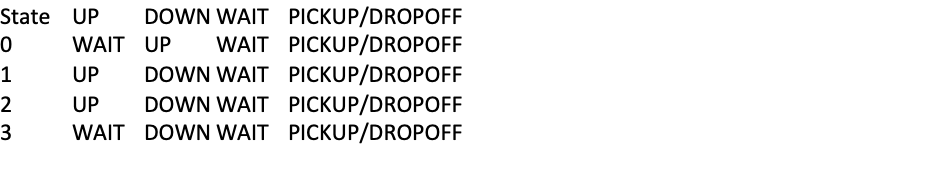

The policy table demonstrates that in the absence of passengers, the elevator tends to remain idle at the first and last floors (states 0 and 3). However, when passengers are present, it usually travels up to floors 1 and 2 and then returns to serve them. The specific policy may vary based on the Q-learning's learning rate and exploration rate.


In [ ]:
total_floors = 5 # number of floors in the building
total_capacity = 4 # maximum number of passengers the elevator can carry
states = []

# iterate over all possible numbers of passengers in the elevator (0 to total_capacity)
for num_passengers in range(total_capacity + 1):
    # iterate over all possible floors for the elevator (0 to total_floors-1)
    for floor in range(total_floors):
        # iterate over all possible floors for each passenger in the elevator (-1 means the passenger is not in the elevator)
        for passenger_floor1 in range(-1, total_floors):
            for passenger_floor2 in range(-1, total_floors):
                for passenger_floor3 in range(-1, total_floors):
                    # exclude states where multiple passengers are at the same floor
                    if len(set([passenger_floor1, passenger_floor2, passenger_floor3])) == len([passenger_floor1, passenger_floor2, passenger_floor3]):
                        # exclude states where passengers are on a floor above the elevator
                        if passenger_floor1 <= floor and passenger_floor2 <= floor and passenger_floor3 <= floor:
                            # add this state to the list of states
                            states.append((floor, num_passengers, passenger_floor1, passenger_floor2, passenger_floor3))


In [ ]:
import numpy as np

# create Q-table
q_table = np.zeros((4, 4, 2))

# define the states
states = [(0, 0), (0, 1), (1, 0), (1, 1)]

# loop through each state and find the best action
for state in states:
    max_q_value = np.max(q_table[state[0], state[1], :])
    best_action = np.argmax(q_table[state[0], state[1], :])
    print(f"State {state}: Best action is {best_action}")


State (0, 0): Best action is 0
State (0, 1): Best action is 0
State (1, 0): Best action is 0
State (1, 1): Best action is 0
